### The code below sweeps gamma from gamma_min to gamma_max in 'steps'
### and diagonalizes the Hamiltonian, to look for energy level collisions
### it returns an array of (gamma, min_gap) where min_gap
### min_gap: the minimum separation between any two eigenvalues at that gamma.

Approx. EP found near gamma = 1.8773466833541927 with gap = 0.06997743778100074


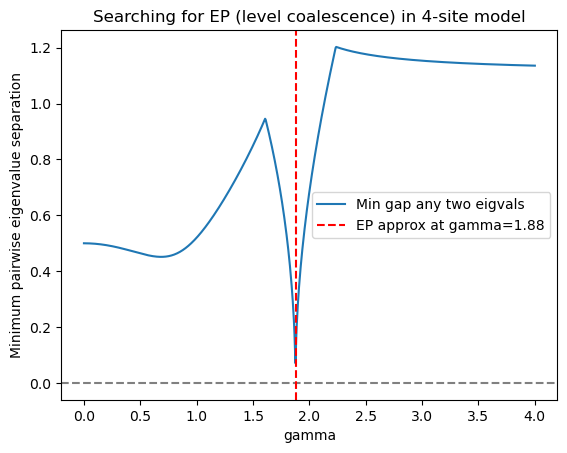

In [22]:
import numpy as np
import matplotlib.pyplot as plt

"""
last atom decoupled.
sweep away!
"""

def H_4_site(t1, t2, gamma, E=0):
    """
    4x4 Hamiltonian for given t1, t2, gamma
    """
    mat = np.array([
        [-1j*gamma,  t1,        0,         0     ],
        [ t1,    -1j*gamma,     t2,        0     ],
        [ 0,       t2,     -1j*gamma,     t1     ],
        [ 0,        0,         t1,        0      ]
    ], dtype=complex)
    return mat

def find_ep_numerically(t1, t2, gamma_min=0.0, gamma_max=5.0, steps=1000):
    gammas = np.linspace(gamma_min, gamma_max, steps)
    results = []
    for g in gammas:
        H = H_4_site(t1, t2, g)
        eigvals = np.linalg.eigvals(H)
        # Compare all pairwise differences
        # We'll measure "closeness" in the complex plane (absolute difference).
        min_dist = np.inf
        for i in range(len(eigvals)):
            for j in range(i+1, len(eigvals)):
                dist = np.abs(eigvals[i] - eigvals[j])
                if dist < min_dist:
                    min_dist = dist
        results.append((g, min_dist))
    return np.array(results)

if __name__ == "__main__":
    t1_val = 1.0
    t2_val = 0.5

    data = find_ep_numerically(t1_val, t2_val, gamma_min=0.0, gamma_max=4.0, steps=800)
    gammas = data[:,0]
    min_gaps = data[:,1]

    # Find the gamma that minimizes the gap
    idx_min = np.argmin(min_gaps)
    gamma_at_ep = gammas[idx_min]

    print("Approx. EP found near gamma =", gamma_at_ep, "with gap =", min_gaps[idx_min])

    # Optionally plot the minimal gap vs gamma
    plt.plot(gammas, min_gaps, label="Min gap any two eigvals")
    plt.axhline(0, c = 'gray', ls='--')
    plt.axvline(gamma_at_ep, color="r", linestyle="--", label=f"EP approx at gamma={gamma_at_ep:.2f}")
    plt.xlabel("gamma")
    plt.ylabel("Minimum pairwise eigenvalue separation")
    plt.title("Searching for EP (level coalescence) in 4-site model")
    plt.legend()
    plt.show()


Approx. EP found near gamma = 1.281602002503129 with gap = 0.004642264977651189


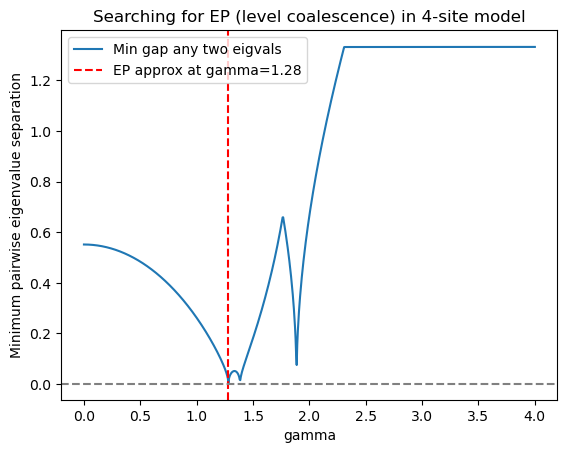

In [20]:
import numpy as np
import matplotlib.pyplot as plt

"""
2 atoms decoupled.
sweep away!
"""

def H_4_site(t1, t2, gamma, E=0):
    """
    4x4 Hamiltonian for given t1, t2, gamma
    """
    mat = np.array([
        [-1j*gamma,  t1,        0,         0     ],
        [ t1,    -1j*gamma,     t2,        0     ],
        [ 0,       t2,          0,        t1     ],
        [ 0,        0,         t1,        0      ]
    ], dtype=complex)
    return mat

def find_ep_numerically(t1, t2, gamma_min=0.0, gamma_max=5.0, steps=1000):
    gammas = np.linspace(gamma_min, gamma_max, steps)
    results = []
    for g in gammas:
        H = H_4_site(t1, t2, g)
        eigvals = np.linalg.eigvals(H)
        # Compare all pairwise differences
        # We'll measure "closeness" in the complex plane (absolute difference).
        min_dist = np.inf
        for i in range(len(eigvals)):
            for j in range(i+1, len(eigvals)):
                dist = np.abs(eigvals[i] - eigvals[j])
                if dist < min_dist:
                    min_dist = dist
        results.append((g, min_dist))
    return np.array(results)

if __name__ == "__main__":
    t1_val = 0.666
    t2_val = 1.333

    data = find_ep_numerically(t1_val, t2_val, gamma_min=0.0, gamma_max=4.0, steps=800)
    gammas = data[:,0]
    min_gaps = data[:,1]

    # Find the gamma that minimizes the gap
    idx_min = np.argmin(min_gaps)
    gamma_at_ep = gammas[idx_min]

    print("Approx. EP found near gamma =", gamma_at_ep, "with gap =", min_gaps[idx_min])

    # Optionally plot the minimal gap vs gamma
    plt.plot(gammas, min_gaps, label="Min gap any two eigvals")
    plt.axvline(gamma_at_ep, color="r", linestyle="--", label=f"EP approx at gamma={gamma_at_ep:.2f}")
    plt.axhline(0, c = 'gray', ls='--')
    plt.xlabel("gamma")
    plt.ylabel("Minimum pairwise eigenvalue separation")
    plt.title("Searching for EP (level coalescence) in 4-site model")
    plt.legend()
    plt.show()
